# Background

In this project, we will be exploring how Trump tweets. What topics does he often tweet about? What types of tweets from Trump tended to lead to high engagement? What about his language style?

## How to retrieve the twitter data?

In [21]:
import requests
import json
import pandas as pd

In [18]:
# we will use trumptwitterarchive.com which contains all his tweets since 2009
def get_tweets(year):
    url = ('http://www.trumptwitterarchive.com/data/realdonaldtrump/%s.json' %year)
    r = requests.get(url)
    print(str(year) + ' ' + 'done.')
    return r.json()

In [19]:
def save_tweets(years=range(2009,2020)):
    tweets = []
    
    for year in years:
        data = get_tweets(year)
        data_length = len(data)
            
        i = 0
        while i < data_length:
            tweets.append(data[i])
            i = i + 1 
                
    return tweets

In [20]:
with open("trump_tweets.json", "w") as outfile:
    json.dump(save_tweets(), outfile)
    print('ok')

2009 done.
2010 done.
2011 done.
2012 done.
2013 done.
2014 done.
2015 done.
2016 done.
2017 done.
2018 done.
2019 done.
ok


In [24]:
# take a look at the data frame
df = pd.read_json("trump_tweets.json")
df.shape 
print(df)

                   source               id_str  \
0      Twitter Web Client           6971079756   
1      Twitter Web Client           6312794445   
2      Twitter Web Client           6090839867   
3      Twitter Web Client           5775731054   
4      Twitter Web Client           5364614040   
...                   ...                  ...   
44120  Twitter for iPhone  1080084113762197504   
44121  Twitter for iPhone  1079920504268562432   
44122  Twitter for iPhone  1079906462753869824   
44123  Twitter for iPhone  1079902957938925568   
44124  Twitter for iPhone  1079900120047603712   

                                                    text  \
0      From Donald Trump: Wishing everyone a wonderfu...   
1      Trump International Tower in Chicago ranked 6t...   
2      Wishing you and yours a very Happy and Bountif...   
3      Donald Trump Partners with TV1 on New Reality ...   
4      --Work has begun, ahead of schedule, to build ...   
...                                    

## How to clean the data? 

In [31]:
from nltk.tokenize import TweetTokenizer
tk = TweetTokenizer()

def tokenize_tweets(data):
    text = ''
    for token in df['text']:
        text = text + token
    tokens = [i.lower() for i in tk.tokenize(text)]
    return tokens

tokens = tokenize_tweets(df)
print(len(tokens))

1024703
['from', 'donald', 'trump', ':', 'wishing', 'everyone', 'a', 'wonderful', 'holiday', '&', 'a', 'happy', ',', 'healthy', ',', 'prosperous', 'new', 'year', '.', 'let']


In [33]:
# remove stop words, special characters and links 
from nltk.corpus import stopwords
import string
punctiuation = list(string.punctuation)
stop = stopwords.words('english') + punctiuation

In [34]:
def complete_tokens(tokens):
    tokens_complete = [t for t in tokens 
                       if (len(t) >= 3) 
                       and (not t.startswith(('#', '@'))) # pass hashtag and username
                       and (not t.startswith('http')) # pass links 
                       and (t not in stop) # pass stop words
                       and (t[0].isalpha())] # make sure all characters are alphabets
    
    return tokens_complete

tokens_clean = complete_tokens(tokens)
print(len(tokens_clean))

412770


## What topics does he often tweet about?

In [37]:
from nltk import FreqDist
hashtags = [t for t in tokens if (t.startswith('#') and len(t) != 1)]
hashtags_freq = FreqDist(hashtags).most_common(10)
print(hashtags_freq)
# it looks like the topics are mostly about promoting his campaign

[('#trump2016', 869), ('#makeamericagreatagain', 519), ('#maga', 267), ('#celebapprentice', 221), ('#celebrityapprentice', 149), ('#trump', 117), ('#americafirst', 102), ('#draintheswamp', 78), ('#trumpforpresident', 76), ('#votetrump', 73)]


## What types of tweets from Trump tended to lead to high engagement? 

In [66]:
# extract the most-liked and most-retweeted tweet
import numpy as np
like_max = np.max(df['favorite_count'])
retweet_max  = np.max(df['retweet_count'])

like = df[df.favorite_count == like_max].index[0]
print("The most-liked tweet from Trump is: " + "\n" + df['text'][like] + "\n" + "The number of likes is " + str(like_max))

retweet = df[df.retweet_count == retweet_max].index[0]
print("The most-retweeted tweet from Trump is: " + "\n" + df['text'][retweet] + "\n" + "The number of retweets is " + str(retweet_max))

The most-liked tweet from Trump is: 
A$AP Rocky released from prison and on his way home to the United States from Sweden. It was a Rocky Week, get home ASAP A$AP!
The number of likes is 879647
The most-retweeted tweet from Trump is: 
#FraudNewsCNN #FNN https://t.co/WYUnHjjUjg
The number of retweets is 369530


## Let's visualize the output

In [71]:
# create time series for data:
time_like = pd.Series(data=df['favorite_count'].values, index=df['created_at'])
time_retweet = pd.Series(data=df['retweet_count'].values, index=df['created_at'])

Text(0.5, 0, 'Time of Creation')

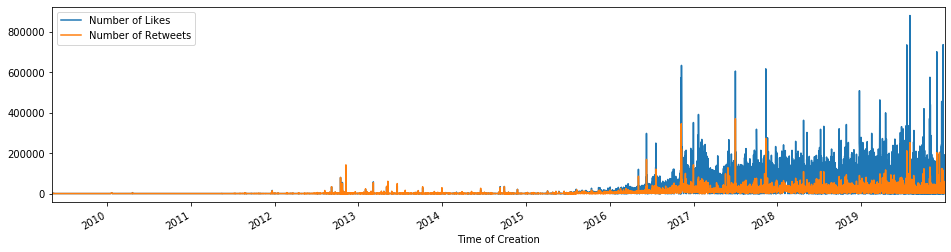

In [86]:
# Likes vs retweets visualization:
time_like.plot(figsize=(16,4), label="Number of Likes", legend=True, x = "cre") 
time_retweet.plot(figsize=(16,4), label="Number of Retweets", legend=True, x = "cre").set_xlabel("Time of Creation")